# Discrete Cosine Transform for the Analysis of Essential Tremor, extracted features

## Purpose

It has proven to be very hard to reproduce the results from [Discrete Cosine Transform for the Analysis of Essential Tremor](https://www.frontiersin.org/articles/10.3389/fphys.2018.01947/full)

I have implemented Discrete Cosine Transformation and the features described in the paper above. The features have been extracted from raw WACOM dataset and saved as HDF5 file to facilitate the reproducibility of this notebook. 

Experiment implementation from paper publication was done in Matlab. This experiment source code was implemented in python and the results and source code is public and open:
https://github.com/spolex/spiral

According to the paper results and discussion section the maximum accuracy was $85.71\%$ obtained for the residue method with 17 coefficients, while for the radius method the best accuracy was $75.51\%$.

In [1]:
### Importing packages
import pandas as pd
import numpy as np
from os import path

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.style.use('seaborn-notebook')
#sorted(mpl.style.available)
sns.set_theme(style="whitegrid")

Loading previously extracted features from radius and residues from Discrete Cosine Transform. They were in hdf5 format. The file contains the following labels (datasets):

* biodarw-YYYYMMDD: origin raw data
* binary_labels_YYYYMMDD.csv: original labels ET-1 and CT-0
* radius_YYYYMMDD.csv: radius
* radius_feat_YYYYMMDD.csv: temporal and frequency fetures extracted from radius
* radius_feat_relief_YYYYMMDD.csv: Relief top 5 features
* residues_17_YYYYMMDD.csv: residues
* residues_feat_17_YYYYMMDD.csv: temporal and frequency fetures extracted from residues
* residues_feat_relief_17_YYYYMMDD.csv: Relief top 5 features

In [2]:
residues = pd.read_csv("/data/elekin/data/results/handwriting/residues_17_20220905.csv")
residues = residues.set_index(residues.columns[0]).sort_index()
print("Loaded data from CSV")
residues.head(10)

Loaded data from CSV


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,0.0,139.606018,12.253823,74.690512,11.408070,53.418940,16.638002,35.400345,12.710705,31.302645,...,97.716552,114.776394,67.099198,47.384320,97.479009,149.785267,65.237339,76.287562,109.274009,603.564931
C01_2,0.0,177.624753,0.348489,98.753315,1.625123,65.488730,1.758768,53.448428,3.054443,38.169044,...,240.696817,219.388447,240.718694,280.058794,239.461137,208.220358,241.678183,365.281105,243.957987,572.808433
C02_1,0.0,165.150944,75.170220,60.824241,79.705065,1.594562,60.441501,32.667529,28.177814,39.863271,...,324.536773,317.472523,331.288106,376.283822,412.076268,377.760042,347.376473,355.744525,521.706493,978.147871
C02_2,0.0,173.554782,12.574759,98.943861,6.678424,54.118429,28.924473,67.616441,19.483121,21.156167,...,213.505816,194.441984,200.659434,236.751032,214.852886,193.616052,200.701936,312.150183,216.979357,582.719324
C03_1,0.0,166.058937,8.162449,90.288484,7.655655,63.642081,11.264714,44.946999,8.133135,39.269829,...,110.127463,141.380816,87.824980,51.011631,123.359510,208.409523,115.789266,43.064404,172.843460,777.956310
C03_2,0.0,180.359529,41.200908,86.240933,48.963521,45.659225,48.672469,23.795015,44.798236,12.303252,...,38.222312,29.984141,71.762030,26.147981,54.860823,81.810776,91.380828,136.944889,78.256296,626.050290
C04_1,0.0,161.031038,40.035450,75.208474,46.378921,37.164575,44.491143,13.810898,39.459239,1.067534,...,46.891543,67.959744,110.171362,56.936817,48.192530,135.669382,163.174494,76.527400,77.918980,665.297013
C04_2,0.0,110.061879,99.067986,40.937046,12.905609,44.446037,36.510156,14.889112,16.816469,25.185347,...,76.435121,85.696488,75.602701,75.550565,94.693787,88.904230,80.546806,104.947726,186.368011,326.125588
C05_1,0.0,148.984471,57.586698,53.911191,59.539912,8.614326,46.548562,16.633512,28.419032,26.986916,...,85.416671,70.591868,148.288139,146.469909,84.803629,166.218256,254.952333,117.337076,120.770225,680.851825


In [32]:
residues.shape

(53, 4096)

Loading labels based on clinic, residues and features extracted from residues DCT.


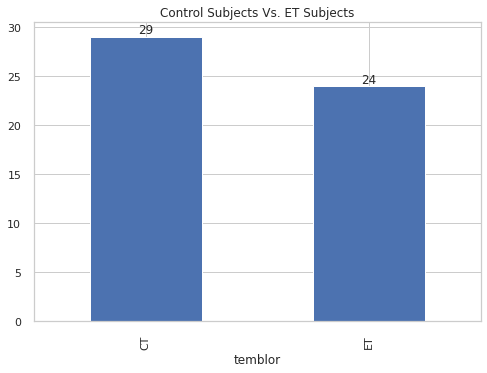

In [3]:
y = pd.read_csv("/data/elekin/data/results/handwriting/binary_labels_20220903.csv", index_col=0).sort_index()
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects')
_ = ax.bar_label(ax.containers[0])
_=ax.set_xticklabels(["CT","ET"])

In [15]:
labels=(y=='si').astype(int)
labels.columns = ['labels']

Loading residues and features extracted from residues

In [4]:
rd_features = pd.read_csv("/data/elekin/data/results/handwriting/residues_feat_17_20220905.csv", index_col=0)
rd_features.head()

,mean_abs_val(L),np.var(L),root_mean_square(L),log_detector(L),wl(L),np.nanstd(L),diff_abs_std(L),higuchi(L),mfl(L),myo(L),...,mp(Pxx),tp(Pxx),meanfreq(L),medfreq(L),std_psd(Pxx),"mmnt(Pxx, order=1)","mmnt(Pxx, order=2)","mmnt(Pxx, order=3)",kurt(Pxx),skw(Pxx)
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,54.116003,865.674535,3794.216318,0.0,4850.938246,29.422348,8.867547,1.392951,8.486927,0.025879,...,1730.504097,3.545803e+06,0.381254,0.000620,22482.654050,0.0,5.054697e+08,2.853277e+14,741.996644,25.107367
C01_2,124.474732,1413.060103,16907.019010,0.0,5808.599479,37.590692,7.967074,1.452476,8.667095,0.001465,...,2824.740938,5.787894e+06,0.309356,0.000592,38193.996786,0.0,1.458781e+09,1.618950e+15,1024.683906,29.056826
C02_1,166.628068,1867.357173,29632.270298,0.0,4810.040417,43.212928,8.551455,1.236727,8.478461,0.001709,...,3732.891645,7.648695e+06,0.305790,0.000002,49810.719233,0.0,2.481108e+09,3.303498e+15,782.549473,26.730409
C02_2,170.240765,3236.246214,32218.164276,0.0,6796.921691,56.888015,7.980086,1.242058,8.824225,0.000244,...,6469.333573,1.325566e+07,0.332161,0.000892,118446.730516,0.0,1.402963e+10,5.493824e+16,1223.476198,33.060201
C03_1,114.529177,872.016862,13988.949350,0.0,6063.184256,29.529932,11.197736,1.502282,8.709990,0.000244,...,1743.182560,3.571781e+06,0.364098,0.000633,27826.930995,0.0,7.743381e+08,7.876198e+14,1487.691054,36.552805


In [5]:
rd_features.columns

Index(['mean_abs_val(L)', 'np.var(L)', 'root_mean_square(L)',
       'log_detector(L)', 'wl(L)', 'np.nanstd(L)', 'diff_abs_std(L)',
       'higuchi(L)', 'mfl(L)', 'myo(L)', 'iemg(L)', 'ssi(L)', 'zc(L)',
       'ssc(L)', 'wamp(L)', 'p_max(Pxx, L)', 'f_max(Pxx)', 'mp(Pxx)',
       'tp(Pxx)', 'meanfreq(L)', 'medfreq(L)', 'std_psd(Pxx)',
       'mmnt(Pxx, order=1)', 'mmnt(Pxx, order=2)', 'mmnt(Pxx, order=3)',
       'kurt(Pxx)', 'skw(Pxx)'],
      dtype='object')

See below the shape of extracted features (27), number of data points for residues and radius (4096) and total number of samples (50). In order to ensure the same number ofpoints in each sequence, we resampled all the exercises to enforce 4096 points in all of them.

In [6]:
residues.shape,rd_features.shape,y.shape

((53, 4096), (53, 27), (53, 1))

In [38]:
rd_rd = residues
rd_rd.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,0.0,139.606018,12.253823,74.690512,11.408070,53.418940,16.638002,35.400345,12.710705,31.302645,...,97.716552,114.776394,67.099198,47.384320,97.479009,149.785267,65.237339,76.287562,109.274009,603.564931
C01_2,0.0,177.624753,0.348489,98.753315,1.625123,65.488730,1.758768,53.448428,3.054443,38.169044,...,240.696817,219.388447,240.718694,280.058794,239.461137,208.220358,241.678183,365.281105,243.957987,572.808433
C02_1,0.0,165.150944,75.170220,60.824241,79.705065,1.594562,60.441501,32.667529,28.177814,39.863271,...,324.536773,317.472523,331.288106,376.283822,412.076268,377.760042,347.376473,355.744525,521.706493,978.147871
C02_2,0.0,173.554782,12.574759,98.943861,6.678424,54.118429,28.924473,67.616441,19.483121,21.156167,...,213.505816,194.441984,200.659434,236.751032,214.852886,193.616052,200.701936,312.150183,216.979357,582.719324
C03_1,0.0,166.058937,8.162449,90.288484,7.655655,63.642081,11.264714,44.946999,8.133135,39.269829,...,110.127463,141.380816,87.824980,51.011631,123.359510,208.409523,115.789266,43.064404,172.843460,777.956310


## Features Analysis based on Pearson Correlation

As the first step we can try to visualy identify correlation between features and also with target class

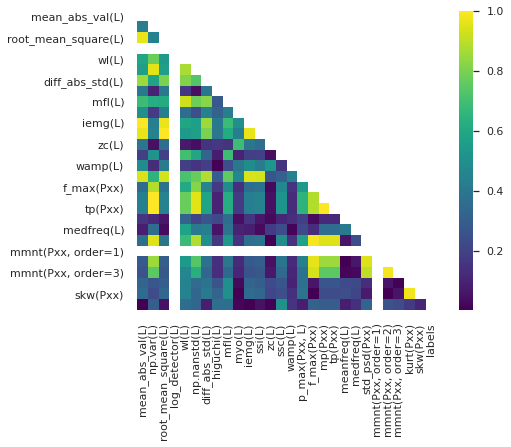

In [16]:
df=rd_features.join(labels)
corrMatrix = df.corr("pearson")
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
_ = sns.heatmap(corrMatrix.abs(), mask=mask, square=True, cmap="viridis")

There is not strong correlation between independent variables (features) and dependent variable "labels" (target). Furthermore, some of the features are highly correlated. This can lead multicollinearity. **Multicollinearity** is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model. Let's analyce the most correlated variables with target.

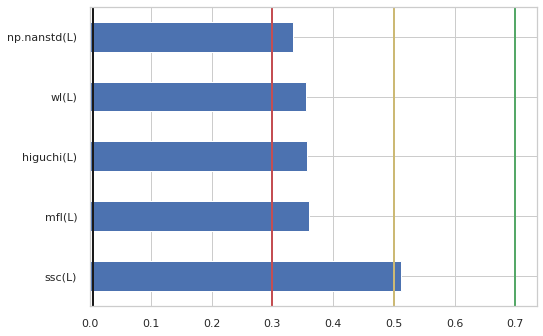

In [18]:
top5 = corrMatrix.abs().labels.sort_values(ascending=False)[0:6]
top5[1:6].plot.barh()
plt.plot([0.7, 0.7],[-1.0,10.0], 'g-', lw=2)
plt.plot([0.5, 0.5],[-1.0,10.0], 'y-', lw=2)
plt.plot([0.3, 0.3],[-1.0,10.0], 'r-', lw=2)
_=plt.plot([0.005, 0.005],[-1.0,10.0], 'k-', lw=2)

Pearson correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. We did not fing strongly correlated features with target variables.

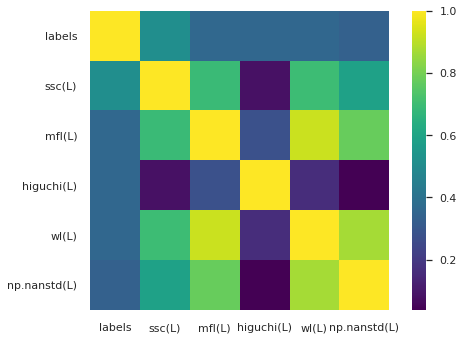

In [21]:
_=sns.heatmap(corrMatrix[top5.index].abs().loc[top5.index], square=True, cmap="viridis")

In [22]:
r_r = pd.read_csv("/data/elekin/data/results/handwriting/radius_20220905.csv", index_col=0)
r_features = pd.read_csv("/data/elekin/data/results/handwriting/radius_feat_20220905.csv", index_col=0)
r_features.head()

,mean_abs_val(L),np.var(L),root_mean_square(L),log_detector(L),wl(L),np.nanstd(L),diff_abs_std(L),higuchi(L),mfl(L),myo(L),...,mp(Pxx),tp(Pxx),meanfreq(L),medfreq(L),std_psd(Pxx),"mmnt(Pxx, order=1)","mmnt(Pxx, order=2)","mmnt(Pxx, order=3)",kurt(Pxx),skw(Pxx)
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,853.617883,116584.633359,845248.122834,0.0,7614.011546,341.444920,9.649469,1.239727,8.937745,0.0,...,233055.470101,4.775307e+08,0.256546,0.000040,5.322304e+06,0.0,2.832692e+13,5.181371e+21,1321.523125,34.367314
C01_2,806.515593,100913.730397,751381.132694,0.0,7093.652946,317.669215,12.559402,1.496532,8.866956,0.0,...,201728.960325,4.133426e+08,0.318207,0.000619,4.805708e+06,0.0,2.309483e+13,4.042949e+21,1449.374714,36.427226
C02_1,858.737103,68982.060883,806411.473524,0.0,6186.845831,262.644362,11.017196,1.407526,8.730181,0.0,...,137896.789349,2.825505e+08,0.271472,0.000002,3.164348e+06,0.0,1.001310e+13,1.257572e+21,1689.617911,39.689941
C02_2,841.602621,104223.059328,812518.030433,0.0,8331.874263,322.835963,12.367719,1.329972,9.027844,0.0,...,208344.387998,4.268977e+08,0.310385,0.000706,4.511921e+06,0.0,2.035743e+13,2.559965e+21,815.236583,27.870813
C03_1,849.992932,71805.480832,794293.465903,0.0,6131.607209,267.965447,11.654179,1.555341,8.721212,0.0,...,143540.873348,2.941152e+08,0.286844,0.000588,3.194840e+06,0.0,1.020700e+13,1.223393e+21,1533.726699,37.516177


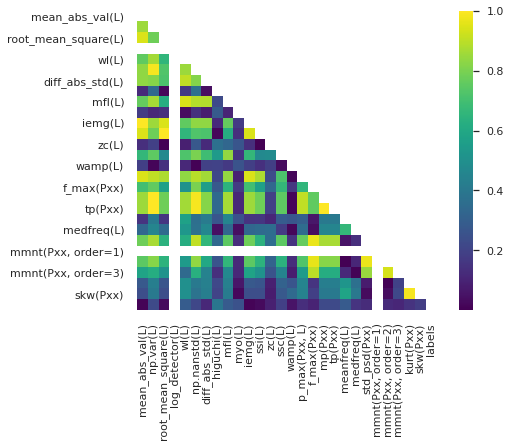

In [23]:
df=r_features.join(labels)
corrMatrix = df.corr("pearson")
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
_ = sns.heatmap(corrMatrix.abs(), mask=mask, square=True, cmap="viridis")

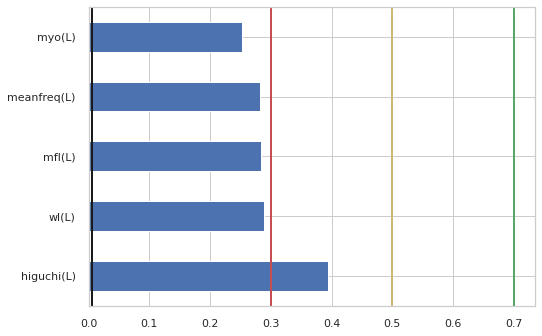

In [24]:
top5 = corrMatrix.abs().labels.sort_values(ascending=False)[0:6]
top5[1:6].plot.barh()
plt.plot([0.7, 0.7],[-1.0,10.0], 'g-', lw=2)
plt.plot([0.5, 0.5],[-1.0,10.0], 'y-', lw=2)
plt.plot([0.3, 0.3],[-1.0,10.0], 'r-', lw=2)
_=plt.plot([0.005, 0.005],[-1.0,10.0], 'k-', lw=2)

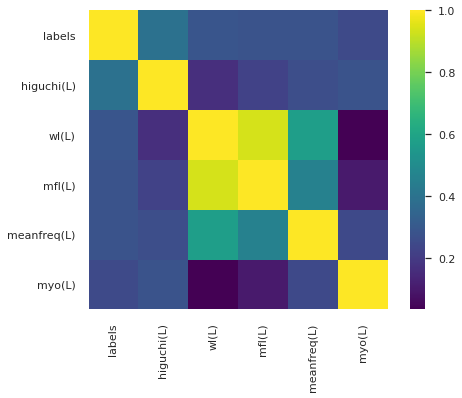

In [26]:
_=sns.heatmap(corrMatrix[top5.index].abs().loc[top5.index], square=True, cmap="viridis")

## Relief-Based Feature Selection
For details on the algorithmic differences between the various Relief algorithms, please refer to [this research paper](https://arxiv.org/abs/1711.08477)

After applying ReliefF we obtained the scoring of the importance for each variable according to the ReliefF scoring process.

### Residue method:

#### ReliefF

1. Difference Absolute standard deviation (diff_abs_std)
2. Maximum fractal length (mfl)
3. Fractal dimension (higuchi)
4. Waveform length (wl) 
5. skewness (SKW)

#### RFE and ReliefF

1. Difference Absolute standard deviation (diff_abs_std)
3. Fractal dimension (higuchi)
2. Maximum fractal length (mfl)
4. Mean Frequency (meanfreq) 
5. skewness (SKW)



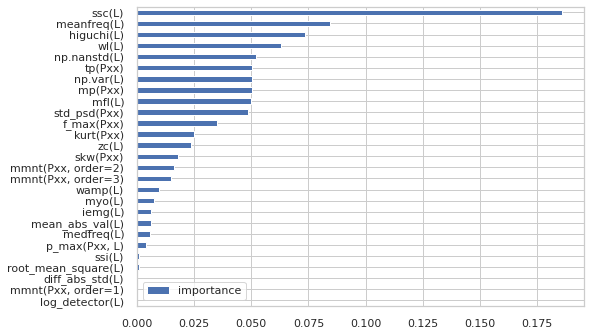

In [37]:
from skrebate import ReliefF

fltr = ReliefF(n_features_to_select=5)
fs = fltr.fit(rd_features.values, labels.values.ravel())
_=pd.DataFrame(fs.feature_importances_, rd_features.columns, columns=["importance"]).abs().sort_values("importance", ascending=True).plot.barh()

### Radius method:

#### ReliefF

1. Zero crossing (zc)
2. Fractal dimension (higuchi)
3. Difference Absolute standard deviation (diff_abs_std)
4. Maximum Fractal Length (mfl) 
5. Kurtosis (kurt)

#### RFE and ReliefF

1. Mean absolute value (mean_abs_val), 
2. Difference Absolute standard deviation (diff_abs_std)
3. Fractal dimension (higuchi)
4. Maximum Fractal Length (mflL)
5. Zero Crossing (zc)


In [39]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = make_pipeline(ReliefF(n_features_to_select=5, n_neighbors=100),
                    RandomForestClassifier(50))

print(np.mean(cross_val_score(clf, rd_features.values, labels.values.ravel())))

0.66


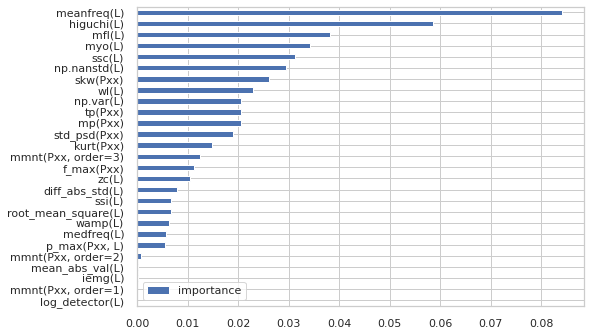

In [41]:
fltr = ReliefF(n_features_to_select=5)
fs = fltr.fit(r_features.values, labels.values.ravel())
_=pd.DataFrame(fs.feature_importances_, r_features.columns, columns=["importance"]).abs().sort_values("importance", ascending=True).plot.barh()

In [43]:
clf = make_pipeline(ReliefF(n_features_to_select=5, n_neighbors=100),
                    RandomForestClassifier(15))

print(np.mean(cross_val_score(clf, r_features.values, labels.values.ravel())))

0.5436363636363636


## Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [44]:
from sklearn.feature_selection import RFE
print(RFE.__doc__)

Feature ranking with recursive feature elimination.

    Given an external estimator that assigns weights to features (e.g., the
    coefficients of a linear model), the goal of recursive feature elimination
    (RFE) is to select features by recursively considering smaller and smaller
    sets of features. First, the estimator is trained on the initial set of
    features and the importance of each feature is obtained either through
    any specific attribute or callable.
    Then, the least important features are pruned from current set of features.
    That procedure is recursively repeated on the pruned set until the desired
    number of features to select is eventually reached.

    Read more in the :ref:`User Guide <rfe>`.

    Parameters
    ----------
    estimator : ``Estimator`` instance
        A supervised learning estimator with a ``fit`` method that provides
        information about feature importance
        (e.g. `coef_`, `feature_importances_`).

    n_features_to_se

In [45]:
selector = RFE(ReliefF(), n_features_to_select=5)
selector_rd = selector.fit(rd_features.values, labels.values.ravel())
idx_rd = np.where(selector_rd.ranking_ == 1)
rd_features.columns[idx_rd]

Index(['wl(L)', 'np.nanstd(L)', 'higuchi(L)', 'mfl(L)', 'ssc(L)'], dtype='object')

The density plots on the diagonal make it easier to compare distributions between the clinic (ET) and controls (CT) subjects than stacked bars. Unfortunately, even though we are working with more important variables **there are not** strong differences between ET and CT

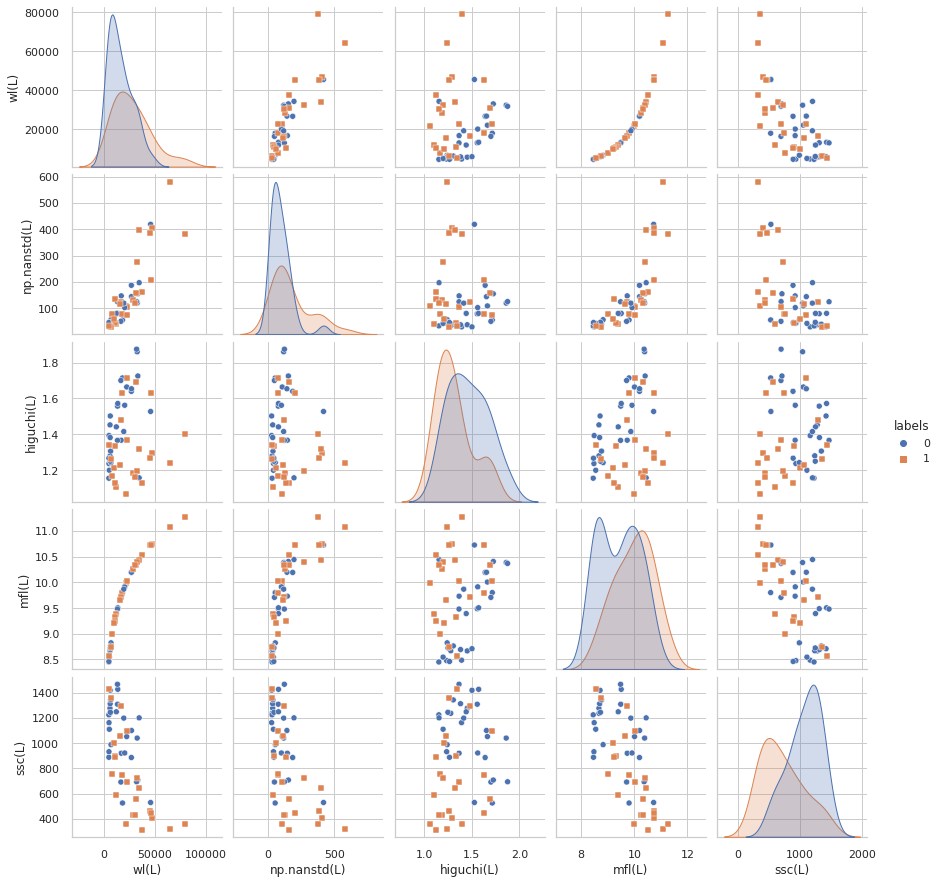

In [46]:
_=sns.pairplot(rd_features[rd_features.columns[idx_rd]].join(labels), hue="labels", markers=["o", "s"])

In [48]:
clf = make_pipeline(selector_rd,
                    RandomForestClassifier(n_estimators=15))

print(np.mean(cross_val_score(clf, rd_features.values, labels.values.ravel())))

0.6618181818181819


In [50]:
selector_r = selector.fit(r_features.values, labels.values.ravel())
idx_r = np.where(selector_r.ranking_ == 1)
r_features.columns[idx_r]

Index(['higuchi(L)', 'mfl(L)', 'myo(L)', 'ssc(L)', 'meanfreq(L)'], dtype='object')

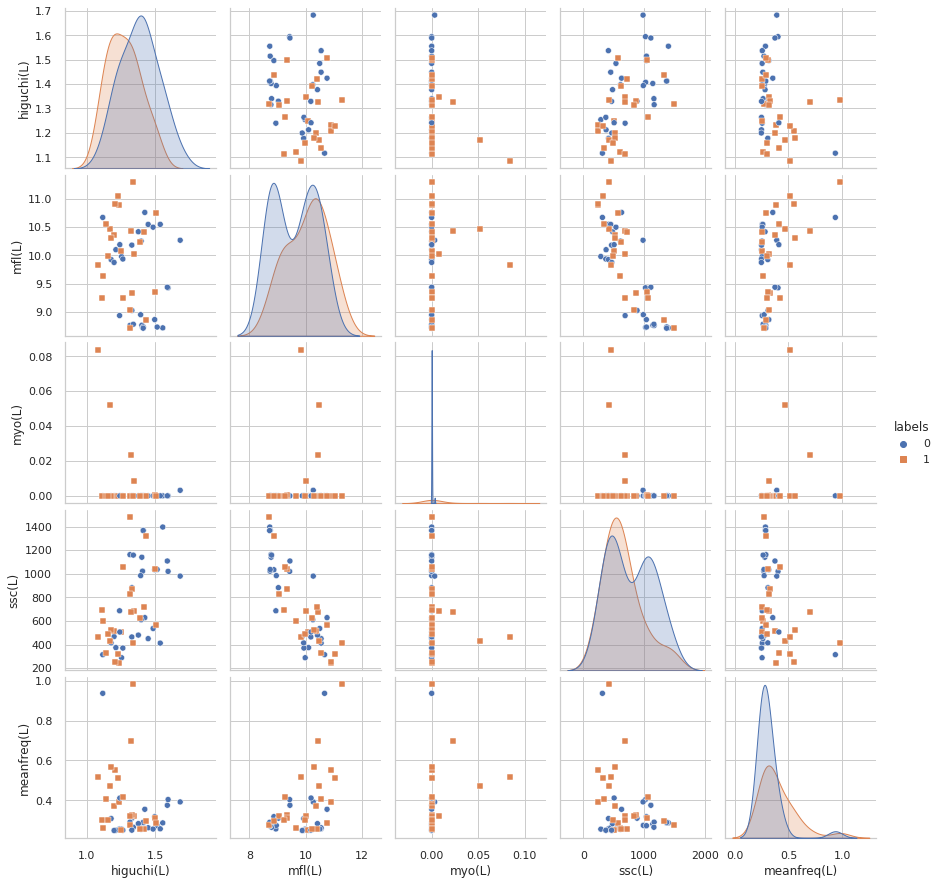

In [51]:

_=sns.pairplot(r_features[r_features.columns[idx_r]].join(labels), hue="labels", markers=["o", "s"])


In [52]:
clf = make_pipeline(selector_r,
                    RandomForestClassifier(n_estimators=15))

print(np.mean(cross_val_score(clf, r_features.values, labels.values.ravel())))

0.4890909090909091


## Classification system

To evaluate the performance of these algorithms we implemented the leave-one-out technique. Although all the drawing samples have been done with a template and the same pen tablet, the number of drawing points acquired was different for each sample. Linear Discriminant analysis (LDA), k-nearest neighbors (k- NN) and support vector machine (SVM) with radial basis kernel have been used as classification algorithm to discriminate between ET and control subjects. To

In [53]:
#adding local modules
import sys
from os import path

module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis.clf_loo import analysis_loo

In [59]:
X=rd_features
analysis_loo(X, y.values.ravel()) 

train score svm
1.0
test score svm
0.5471698113207547
train score Random forest
0.9923802612481859
test score Random forest
0.6981132075471698
train score Knn
0.9952830188679247
test score Knn
0.6792452830188679
train score LDA
0.9916545718432512
test score LDA
0.6792452830188679


In [60]:
X=r_features
analysis_loo(X, y.values.ravel()) 

train score svm
1.0
test score svm
0.5660377358490566
train score Random forest
0.9960087082728593
test score Random forest
0.6226415094339622
train score Knn
0.9938316400580552
test score Knn
0.660377358490566
train score LDA
0.9952830188679247
test score LDA
0.5849056603773585
